<a href="https://colab.research.google.com/github/turkozlo/mnist_base/blob/main/mnist_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импортируем зависимости

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import matplotlib.image as mpimg

# Загружаем датасет, делим его на обучающую и тестовую выборку, преобразовываем изображения в удобный формат (одномерный нормализованный массив)

In [ ]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Преобразование данных
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Преобразование меток в формат one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Создаём архитектуру модели, компилируем, обучаем, и строим графики обучения

Epoch 1/6
3750/3750 [==============================] - 19s 5ms/step - loss: 0.2138 - accuracy: 0.9353 - val_loss: 0.1659 - val_accuracy: 0.9529
Epoch 2/6
3750/3750 [==============================] - 15s 4ms/step - loss: 0.1067 - accuracy: 0.9675 - val_loss: 0.0945 - val_accuracy: 0.9724
Epoch 3/6
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0797 - accuracy: 0.9761 - val_loss: 0.1038 - val_accuracy: 0.9723
Epoch 4/6
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0646 - accuracy: 0.9804 - val_loss: 0.1163 - val_accuracy: 0.9690
Epoch 5/6
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.0966 - val_accuracy: 0.9747
Epoch 6/6
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.0976 - val_accuracy: 0.9762


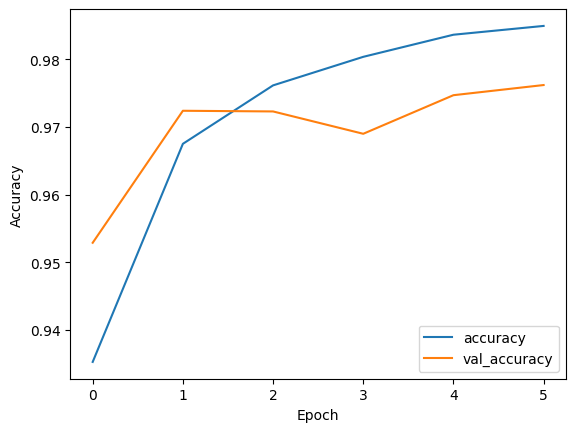

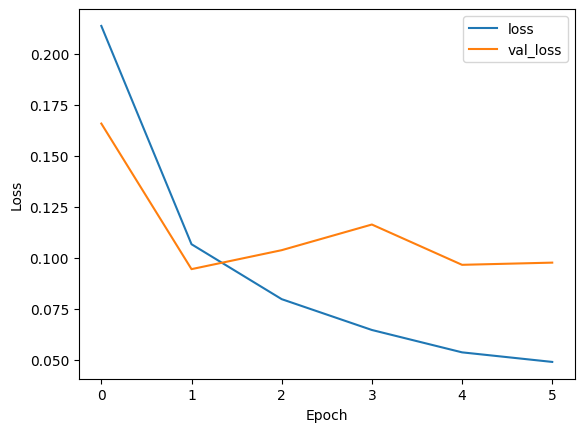

313/313 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9762
Loss: 0.09764781594276428, Accuracy: 0.9761999845504761


In [ ]:
# Создание модели
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели (Эпох всего 6, т.к дальше идёт переобучение (можете по эксперементировать))
history = model.fit(x_train, y_train, epochs=6, batch_size=16, validation_data=(x_test, y_test))

# Графики обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Качаем картинки с интернета

In [ ]:
!pip install patool
import requests
from urllib.parse import urlencode
import patoolib
import os

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/yhZnDXuZTVC2_g'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл и сохраняем его
download_response = requests.get(download_url)
downloaded_file_path = '/content/pictures.rar'

with open(downloaded_file_path, 'wb') as f:
    f.write(download_response.content)

# Разархивируем файл
extracted_path = '/content/pictures/'

# Проверяем, существует ли папка для распаковки, и создаем ее при необходимости
if not os.path.exists(extracted_path):
    os.makedirs(extracted_path)

# Распаковываем скачанный архив
patoolib.extract_archive(downloaded_file_path, outdir=extracted_path)

# Удаляем изначальный архив
os.remove(downloaded_file_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 1.8 MB/s eta 0:00:00


INFO patool: Extracting /content/pictures.rar ...
INFO:patool:Extracting /content/pictures.rar ...
INFO patool: running /usr/bin/unrar x -- /content/pictures.rar
INFO:patool:running /usr/bin/unrar x -- /content/pictures.rar
INFO patool:     with cwd='/content/pictures/', input=''
INFO:patool:    with cwd='/content/pictures/', input=''
INFO patool: ... /content/pictures.rar extracted to `/content/pictures/'.
INFO:patool:... /content/pictures.rar extracted to `/content/pictures/'.


# Если нужно, можно сохранить обученную модель

In [ ]:
model.save_weights('/content/weights.h5')

# Проверяем работу на конкретном изображении

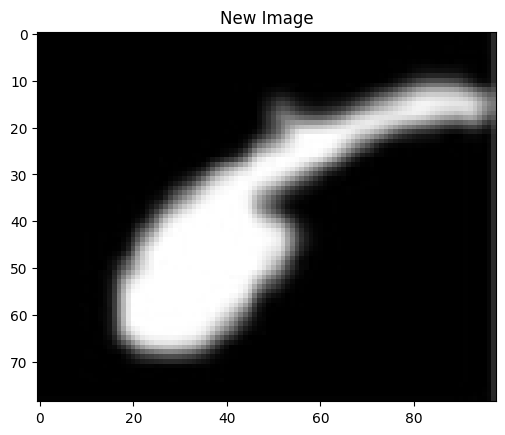

1/1 [==============================] - 0s 19ms/step
Predicted class: 6


In [ ]:
from keras.preprocessing import image
import matplotlib.image as mpimg

#Закоментируйте, если не сохраняли модель
model.load_weights('/content/weights.h5', by_name=True)

# Путь к новому изображению
new_image_path = '/content/pictures/pictures/6.png'

# Загрузка и предобработка изображения
new_image = image.load_img(new_image_path, target_size=(28, 28), color_mode='grayscale')
new_image_array = image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_array /= 255.0  # Нормализация

# Вывод нового изображения
img = mpimg.imread(new_image_path)
imgplot = plt.imshow(img, cmap='gray')
plt.title('New Image')
plt.show()

# Предсказание с использованием обученной модели
predictions = model.predict(new_image_array)
predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)